# Movie Reviews

The analysis uses data contains review scores of various movies for four different movie review services. The data was collected by FiveThirtyEight https://fivethirtyeight.com/features/fandango-movies-ratings/ and can be used to highlight some of the biases that exist in movie review particularly by Fandango.

In [20]:
import pandas as pd

movies = pd.read_csv("fandango_score_comparison.csv")
movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


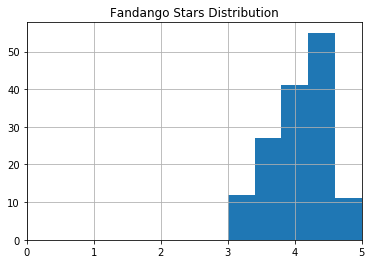

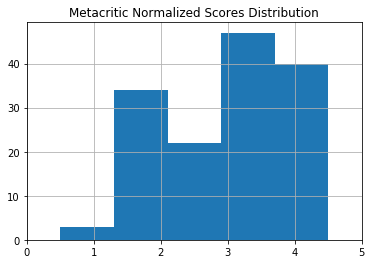

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

movies["Fandango_Stars"].hist(bins=5)
plt.title("Fandango Stars Distribution")
plt.xlim(0,5.0)
plt.show()

movies["Metacritic_norm_round"].hist(bins=5)
plt.title("Metacritic Normalized Scores Distribution")
plt.xlim(0,5.0)
plt.show()

### Comparison of Fandango and Metacritic Distributions

Fandango stars are skewed heavily toward higher scores with almost no scores occuring below 3.  In contrast, metacritic tends to have more reviews on the lower end.  Even still it is somewhat to the right and scores do not follow a perfect normal distribution around the mark of 2.5.

In [22]:
print(round(movies["Fandango_Stars"].mean(),2), round(movies["Metacritic_norm_round"].mean(),2))
print(movies["Fandango_Stars"].median(),movies["Metacritic_norm_round"].median())
print(round(movies["Fandango_Stars"].std(),2),round(movies["Metacritic_norm_round"].std(),2))



4.09 2.97
4.0 3.0
0.54 0.99


### Additional comparisons between Fandango and Metacritic Reviews

What we can see is that the average score of the Fandango score is about 20% higher
at 4.08 compared to 3.0 in Metacritic.  Moreover the median score is a 4 compared to 3 in Metacritic.
In addition the standard deviation is much smaller indicating there is not
much variance from mean at 0.54 compared to 0.99 in Metacritic.  One of the reasons why the median score of Fandango is lower than the mean score of Fandango is simply that there is still an upward skewness in the numbers so the deviation toward 5 is higher than the deviation in numbers that are below 4 even though if we split in the sample in two the mid-point has a value of 4.

Metacritic uses reviews from top critics to come up with scores.  Fandango appears to use review scores
that are a combination of critics, movie fans and parents.  The usage of movie fans may itself
skew results upward if this is appeared to be a selected sample in the first place
that appeals only to a particular set of the population.

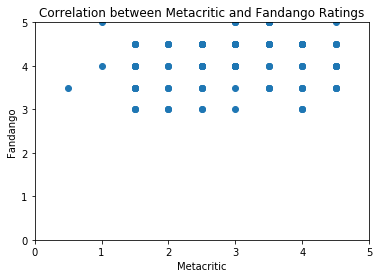

                        FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user

In [23]:
import numpy as np

plt.scatter(x=movies["Metacritic_norm_round"], y=movies["Fandango_Stars"])
plt.title("Correlation between Metacritic and Fandango Ratings")
plt.xlim(0,5.0)
plt.ylim(0,5.0)
plt.xlabel("Metacritic")
plt.ylabel("Fandango")
plt.show()

#sort movies based on the biggest differences and print out top 5
movies["fm_diff"] = movies["Fandango_Stars"]-movies["Metacritic_norm_round"]
movies["fm_diff"] = np.absolute(movies["fm_diff"])
movies = movies.sort_values("fm_diff", ascending=False)
print(movies.head(5))

In [28]:
#Calculate the r-value and correlation coefficient
import scipy.stats as stats

rvalue, pvalue = stats.pearsonr(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
#The linear regression takes metacritic to predict fandango
prval = stats.linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

print("R-value: {}".format(round(rvalue,2)))
print("P-value: {}".format(round(pvalue,2)))
print("Intercept value: {}".format(prval.intercept))
print("Slope value: {}".format(prval.slope))
pred_3 = 3*prval.slope + prval.intercept
print("Predicted Fandango Score (given metacritic rating of 3): {}".format(round(pred_3,2)))

R-value: 0.18
P-value: 0.03
Intercept value: 3.799773918899418
Slope value: 0.09731107797392856
Predicted Fandango Score (given metacritic rating of 3): 4.09


In [29]:
#Calculate predictions of Fandango scores based on linear regression
pred_1 = 1*prval.slope + prval.intercept
pred_5 = 5*prval.slope + prval.intercept

print("Predicted Fandango Score (given metacritic rating of 1): {}".format(round(pred_1,2)))
print("Predicted Fandango Score (given metacritic rating of 5): {}".format(round(pred_5,2)))

Predicted Fandango Score (given metacritic rating of 1): 3.9
Predicted Fandango Score (given metacritic rating of 5): 4.29


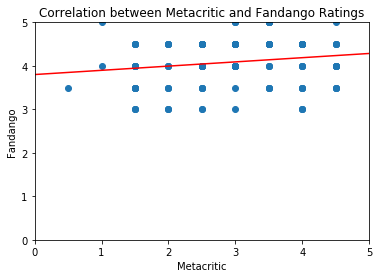

In [31]:
plt.scatter(x=movies["Metacritic_norm_round"], y=movies["Fandango_Stars"])
plt.title("Correlation between Metacritic and Fandango Ratings")
plt.xlim(0,5.0)
plt.ylim(0,5.0)
plt.xlabel("Metacritic")
plt.ylabel("Fandango")
x = np.linspace(0, 5)
plt.plot(x,3.8+0.097*x,color="red")
plt.show()



## Conclusions

Fandango scores are significantly higher than the metacritic review ratings.  It is suggested this bias comes because Fandango's business interests are directly tied to movie sales as opposed to validity in developing scores that are unbiased.